# Monte Carlo Simulation for stochastich financial statements

In [1]:
#import packages
from math import log, sqrt, pi, exp
from scipy.stats import norm
from datetime import datetime, date
import numpy as np
import pandas as pd

In [2]:
#import data
df = pd.read_excel("bd_coffee.xlsx")
df.head()

,date,close_date_6m,close_date_1y,time_6m,time_1y,coffee_cop,implied_vol_6m,implied_vol_1y,r,default_rate
0,2017-01-01,2017-07-18,2017-12-17,0.542466,0.958904,843952.256261,0.334027,0.285752,0.07204,0.16
1,2017-01-02,2017-07-18,2017-12-17,0.539726,0.956164,843952.256261,0.334027,0.285752,0.07204,0.16
2,2017-01-03,2017-07-18,2017-12-17,0.536986,0.953425,846107.552063,0.327560,0.279651,0.07204,0.16
3,2017-01-04,2017-07-18,2017-12-17,0.534247,0.950685,867484.574900,0.334248,0.285960,0.07129,0.16
4,2017-01-05,2017-07-18,2017-12-17,0.531507,0.947945,874782.510283,0.340986,0.292317,0.07124,0.16


## Series Fitting

In [3]:
coffee_hist = df["coffee_cop"].dropna()
coffee_hist

0       8.439523e+05
1       8.439523e+05
2       8.461076e+05
3       8.674846e+05
4       8.747825e+05
            ...     
1821    1.861471e+06
1822    1.847391e+06
1823    1.881263e+06
1824    1.889271e+06
1825    1.846430e+06
Name: coffee_cop, Length: 1826, dtype: float64

In [4]:
r = df["r"].dropna()
r

0       0.07204
1       0.07204
2       0.07204
3       0.07129
4       0.07124
         ...   
1821    0.03398
1822    0.03440
1823    0.03467
1824    0.03511
1825    0.03511
Name: r, Length: 1826, dtype: float64

In [5]:
vol_6m = df["implied_vol_6m"].dropna()
vol_6m

0       0.334027
1       0.334027
2       0.327560
3       0.334248
4       0.340986
          ...   
1821    0.412114
1822    0.402495
1823    0.409220
1824    0.414452
1825    0.413820
Name: implied_vol_6m, Length: 1826, dtype: float64

### Coffee

In [ ]:
%%time
from fitter import Fitter
f1 = Fitter(coffee_hist)
f1.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f1.summary()

### Interest rate

In [ ]:
%%time
from fitter import Fitter
f2 = Fitter(r)
f2.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f2.summary()

### Implied Volatility

In [ ]:
%%time
from fitter import Fitter
f3 = Fitter(vol_6m)
f3.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f3.summary()

In [ ]:
%%time
from fitter import Fitter
f4 = Fitter(vol_1y)
f4.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f4.summary()

## Series Simulation Sample

In [7]:
#calculate returns
df_hist = df.dropna().set_index("date")
df_hist["coffee_pct"] = df_hist["coffee_cop"].pct_change()

,close_date_6m,close_date_1y,time_6m,time_1y,coffee_cop,implied_vol_6m,implied_vol_1y,r,default_rate,coffee_pct
date,,,,,,,,,,
2017-01-01,2017-07-18,2017-12-17,0.542466,0.958904,8.439523e+05,0.334027,0.285752,0.07204,0.16,NaN
2017-01-02,2017-07-18,2017-12-17,0.539726,0.956164,8.439523e+05,0.334027,0.285752,0.07204,0.16,0.000000
2017-01-03,2017-07-18,2017-12-17,0.536986,0.953425,8.461076e+05,0.327560,0.279651,0.07204,0.16,0.002554
2017-01-04,2017-07-18,2017-12-17,0.534247,0.950685,8.674846e+05,0.334248,0.285960,0.07129,0.16,0.025265
2017-01-05,2017-07-18,2017-12-17,0.531507,0.947945,8.747825e+05,0.340986,0.292317,0.07124,0.16,0.008413
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,2022-07-19,2022-12-19,0.558904,0.978082,1.861471e+06,0.412114,0.359418,0.03398,0.54,-0.018184
2021-12-28,2022-07-19,2022-12-19,0.556164,0.975342,1.847391e+06,0.402495,0.350343,0.03440,0.54,-0.007564
2021-12-29,2022-07-19,2022-12-19,0.553425,0.972603,1.881263e+06,0.409220,0.356688,0.03467,0.54,0.018335


### Coffee

In [61]:
S0 = df.at[0, "coffee_cop"]
dt = 1/365
mu = df_hist["coffee_pct"].mean()
sigma = df_hist["coffee_pct"].std() * sqrt(252)

print(S0, " S0")
print(dt, " dt")
print(mu, " Drift")
print(sigma, " Volatility")

843952.2562607114  S0
0.0027397260273972603  dt
0.0005870320026380521  Drift
0.2827023484468384  Volatility


In [72]:
import math
# Parameter Definitions

# So    :   initial stock price
# dt    :   time increment -> a day in our case
# T     :   length of the prediction time horizon(how many time points to predict, same unit with dt(days))
# N     :   number of time points in the prediction time horizon -> T/dt
# t     :   array for time points in the prediction time horizon [1, 2, 3, .. , N]
# mu    :   mean of historical daily returns
# sigma :   standard deviation of historical daily returns
# b     :   array for brownian increments
# W     :   array for brownian path

S0 = df.at[0, "coffee_cop"]
sigma = df_hist["coffee_pct"].std() * sqrt(252)
mu = df_hist["coffee_pct"].mean()
dt = 1/365
time = 0
gbmPrice = S0

drift = mu
price_sim = []
for i in range(len(df)):
    time = time + dt
    drift = mu * dt * gbmPrice
    uncertainity = np.random.normal(0) * math.sqrt(dt) * sigma *gbmPrice
    change = drift + uncertainity
    gbmPrice = gbmPrice + change
    price_sim.append(gbmPrice)


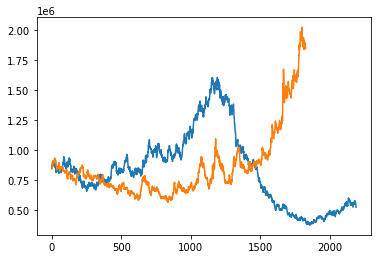

In [73]:
plt.plot(np.array(price_sim))
plt.plot(df["coffee_cop"])

### Interest Rate

Interest Rate Simulation sample: https://sarit-maitra.medium.com/pca-monte-carlo-simulation-for-vasicek-interest-rate-model-9522858cc89d

### Implied Volatility

# Monte Carlo Simulation